In [17]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import requests
from pathlib import Path
import scipy as stats
from scipy.stats import chi2_contingency

In [18]:
#Read the restaurant data CSV doc
restaruantpath= Path("csv_folder/restaurant_data.csv")
restaruantfile=pd.read_csv(restaruantpath,encoding="UTF-8")
restaruantfile

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
0,50041177,FIRSTLIVE STUDIO,Brooklyn,219,CENTRAL AVENUE,11221.0,9292109055,Other,09/24/2015,Violations were cited in the following area(s).,...,Pre-permit (Non-operational) / Initial Inspection,40.697359,-73.923881,304.0,37.0,42100.0,3074096.0,3.032550e+09,BK78,NaN
1,50041177,FIRSTLIVE STUDIO,Brooklyn,219,CENTRAL AVENUE,11221.0,9292109055,Other,09/24/2015,Violations were cited in the following area(s).,...,Pre-permit (Non-operational) / Initial Inspection,40.697359,-73.923881,304.0,37.0,42100.0,3074096.0,3.032550e+09,BK78,NaN
2,50041177,FIRSTLIVE STUDIO,Brooklyn,219,CENTRAL AVENUE,11221.0,9292109055,Other,09/24/2015,Violations were cited in the following area(s).,...,Pre-permit (Non-operational) / Initial Inspection,40.697359,-73.923881,304.0,37.0,42100.0,3074096.0,3.032550e+09,BK78,NaN
3,40944945,Stage 42,Manhattan,422,WEST 42 STREET,10036.0,2125867610,American,09/24/2015,Establishment re-opened by DOHMH.,...,Cycle Inspection / Reopening Inspection,40.758823,-73.993607,104.0,3.0,11500.0,1087184.0,1.010518e+09,MN15,NaN
4,50041177,FIRSTLIVE STUDIO,Brooklyn,219,CENTRAL AVENUE,11221.0,9292109055,Other,09/24/2015,Violations were cited in the following area(s).,...,Administrative Miscellaneous / Initial Inspection,40.697359,-73.923881,304.0,37.0,42100.0,3074096.0,3.032550e+09,BK78,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,50061356,EL ROCHE LEBANON,Queens,2548,STEINWAY ST,11103.0,7182676222,Middle Eastern,12/28/2017,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.767548,-73.912025,401.0,22.0,14300.0,4010285.0,4.006540e+09,QN70,NaN
1423,50061356,EL ROCHE LEBANON,Queens,2548,STEINWAY ST,11103.0,7182676222,Middle Eastern,12/28/2017,Violations were cited in the following area(s).,...,Smoke-Free Air Act / Initial Inspection,40.767548,-73.912025,401.0,22.0,14300.0,4010285.0,4.006540e+09,QN70,NaN
1424,50061356,EL ROCHE LEBANON,Queens,2548,STEINWAY ST,11103.0,7182676222,Middle Eastern,12/28/2017,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.767548,-73.912025,401.0,22.0,14300.0,4010285.0,4.006540e+09,QN70,NaN
1425,50061356,EL ROCHE LEBANON,Queens,2548,STEINWAY ST,11103.0,7182676222,Middle Eastern,12/28/2017,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.767548,-73.912025,401.0,22.0,14300.0,4010285.0,4.006540e+09,QN70,NaN


In [19]:
#Put columns to keep in a list
restaurants_to_keep=['BORO','DBA', 'ZIPCODE','CUISINE DESCRIPTION','INSPECTION DATE','GRADE']
#keep only the selected columns and make a clean copy of the DF
restaruantfile=restaruantfile[restaurants_to_keep].copy()
restaruantfile.head()

,BORO,DBA,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,GRADE
0,Brooklyn,FIRSTLIVE STUDIO,11221.0,Other,09/24/2015,NaN
1,Brooklyn,FIRSTLIVE STUDIO,11221.0,Other,09/24/2015,NaN
2,Brooklyn,FIRSTLIVE STUDIO,11221.0,Other,09/24/2015,NaN
3,Manhattan,Stage 42,10036.0,American,09/24/2015,P
4,Brooklyn,FIRSTLIVE STUDIO,11221.0,Other,09/24/2015,NaN


In [20]:
#change name to match variables.
clean_grade_df=restaruantfile

In [21]:
#Restrict dataset to just September 2010 to September 2017
clean_grade_df['INSPECTION DATE'] = pd.to_datetime(clean_grade_df['INSPECTION DATE']).dt.date
clean_grade_df['Date']=clean_grade_df['INSPECTION DATE']
clean_grade_df['ZIPCODE'].fillna(0,inplace=True)
clean_grade_df['ZIPCODE'] = clean_grade_df['ZIPCODE'].astype(int)
clean_grade_df

C:\Users\Troy Flood\AppData\Local\Temp\ipykernel_17992\552972175.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_grade_df['ZIPCODE'].fillna(0,inplace=True)


,BORO,DBA,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,GRADE,Date
0,Brooklyn,FIRSTLIVE STUDIO,11221,Other,2015-09-24,NaN,2015-09-24
1,Brooklyn,FIRSTLIVE STUDIO,11221,Other,2015-09-24,NaN,2015-09-24
2,Brooklyn,FIRSTLIVE STUDIO,11221,Other,2015-09-24,NaN,2015-09-24
3,Manhattan,Stage 42,10036,American,2015-09-24,P,2015-09-24
4,Brooklyn,FIRSTLIVE STUDIO,11221,Other,2015-09-24,NaN,2015-09-24
...,...,...,...,...,...,...,...
1422,Queens,EL ROCHE LEBANON,11103,Middle Eastern,2017-12-28,NaN,2017-12-28
1423,Queens,EL ROCHE LEBANON,11103,Middle Eastern,2017-12-28,NaN,2017-12-28
1424,Queens,EL ROCHE LEBANON,11103,Middle Eastern,2017-12-28,NaN,2017-12-28
1425,Queens,EL ROCHE LEBANON,11103,Middle Eastern,2017-12-28,NaN,2017-12-28


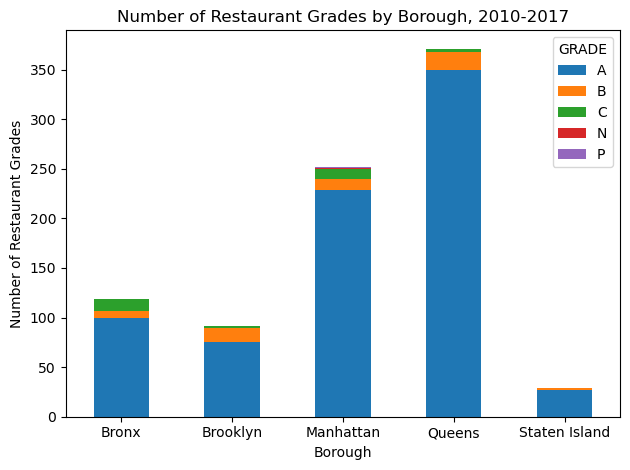

In [22]:
# QUESTION 3: Number of grades by Borough
gradecounts= clean_grade_df.groupby(['BORO', 'GRADE']).size().reset_index(name='count')

Boroughs = gradecounts['BORO']
counts = gradecounts['count']
grades = gradecounts['GRADE']

transposecounts = gradecounts.pivot(index='BORO', columns='GRADE', values='count').fillna(0)

transposecounts.plot(kind='bar', stacked=True)
plt.xlabel('Borough')
plt.ylabel('Number of Restaurant Grades')
plt.title('Number of Restaurant Grades by Borough, 2010-2017')
plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()

In [23]:
# Pare down list of cuisines for Chi-Square test

# Define a mapping dictionary for collapsing cuisines
cuisine_mapping = {
    'American': 'American',
    'Other': 'Other',
    'Korean': 'Asian',
    'Mexican': 'Latin American',
    'Latin American': 'Latin American',
    'Frozen Desserts': 'Desserts/Baked Goods',
    'Hotdogs': 'Fast Food',
    'Pizza': 'Pizza',
    'French':'European',
    'Bottled Beverages':'Coffee/Tea/Beverages',
    'Italian':'Italian',
    'Tex-Mex':'Latin American',
    'Japanese':'Asian',
    'Spanish':'European',
    'Coffee/Tea':'Coffee/Tea/Beverages',
    'Mediterranean':'European',
    'Caribbean':'Caribbean',
    'Middle Eastern': 'Middle Eastern',
    'German':'European',
    'Hamburgers':'Fast Food',
    'Sandwiches/Salads/Mixed Buffet':'Deli',
    'Vegan':'Special Diet',
    'Bagels/Pretzels':'Deli',
    'Jewish/Kosher':'Special Diet',
    'Filipino':'Asian',
    'Indian':'Indian',
    'Sandwiches':'Deli',
    'Seafood':'Seafood',
    'Chinese':'Asian',
    'Eastern European':'European',
    'Donuts':'Desserts/Baked Goods',
    'Soups/Salads/Sandwiches':'Deli',
    'Juice, Smoothies, Fruit Salads':'Juices/Smoothies',
    'African':'African',
    'Russian':'European',
    'Ethiopian':'African',
    'Mexican':'Latin American',
    'Steakhouse':'Steakhouse',
    'Irish':'European'
}

# Replace values in the 'CUISINES' column using the mapping dictionary
clean_grade_df['CollapsedCUISINES'] = clean_grade_df['CUISINE DESCRIPTION'].replace(cuisine_mapping)

cuisinedescriptionsnew = clean_grade_df['CollapsedCUISINES'].unique()
cuisinedescriptionsnew

array(['Other', 'American', 'Caribbean', 'Asian', 'Latin American',
       'Desserts/Baked Goods', 'Fast Food', 'Pizza', 'European',
       'Coffee/Tea/Beverages', 'Italian', 'Special Diet',
       'Middle Eastern', 'Deli', 'Indian', 'Seafood', 'Juices/Smoothies',
       'African', 'Hotdogs/Pretzels', 'Steakhouse'], dtype=object)

In [26]:
#chi square to illustrate relationship between TYPE of restaurant and the DOH Rating.
chi2, p, dof, expected = chi2_contingency(pd.crosstab(clean_grade_df['CollapsedCUISINES'], clean_grade_df['GRADE']))

print("Chi-square test statistic:", chi2)
print("p-value:", p)
print("Degress of Freedom:", dof)

cuisinebyratingdf=pd.crosstab(clean_grade_df['CollapsedCUISINES'], clean_grade_df['GRADE'])
cuisinebyratingdf

Chi-square test statistic: 265.7126696847045
p-value: 5.452859835532691e-24
Degress of Freedom: 72


GRADE,A,B,C,N,P
CollapsedCUISINES,,,,,
African,3,0,0,0,0
American,531,20,6,1,1
Asian,38,7,2,0,0
Caribbean,7,3,0,0,0
Coffee/Tea/Beverages,33,3,1,0,0
Deli,25,0,0,0,0
Desserts/Baked Goods,11,0,0,0,0
European,21,9,6,0,0
Fast Food,19,0,0,0,0
